<h3 style="color:red;">Preterm neonate of 25 weeks of gestation and 0.72 kg with different sizes of persistent ductus arteriosus </h3>


In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# stabilize the model by calculating 120 seconds
neo.calculate(120)

# scale the model to a premature neonate of 25 weeks and 0.72 kg and recalculate 120 seconds
model._scaling.res_factor_circ_correction = 0.6
model._scaling.el_max_factor_correction = 0.8
model._scaling.scale_patient(
    target_weight=0.720,
    target_height=0.32,
    target_blood_volume=0.08,
    target_hr_ref=160,
    target_map=35.0,
)

# stabilize the model by calculating 120 seconds
neo.calculate(120)

# put patient on CPAP
neo.ventilator(True)
models["Ventilator"].set_ventilator_cpap(peep=6.0)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 6.5 sec. Average model step in 0.0273 ms.
 Ready in 7.2 sec. Average model step in 0.0298 ms.


<h5 style="color:red;">Model run results - No PDA</h5>

In [2]:
neo.validate()

Heart.heart_rate: max  158.96651 min  147.50059
AA.pres         : max   51.49967, min   26.88216 mmHg
LA_LV.flow      : net  246.47518, forward  246.47518, backward        0.0 ml/kg/min, stroke volume:    1.57996 ml/kg, 
RA_RV.flow      : net  242.32308, forward  242.32308, backward        0.0 ml/kg/min, stroke volume:    1.55334 ml/kg, 
SVC_RA.flow     : net  107.13168, forward  111.96058, backward    -4.8289 ml/kg/min, stroke volume:    0.68674 ml/kg, 
AAR_AD.flow     : net  137.18936, forward  139.95787, backward   -2.76851 ml/kg/min, stroke volume:    0.87941 ml/kg, 
LV.vol          : max    2.57051, min    0.68451 ml/kg


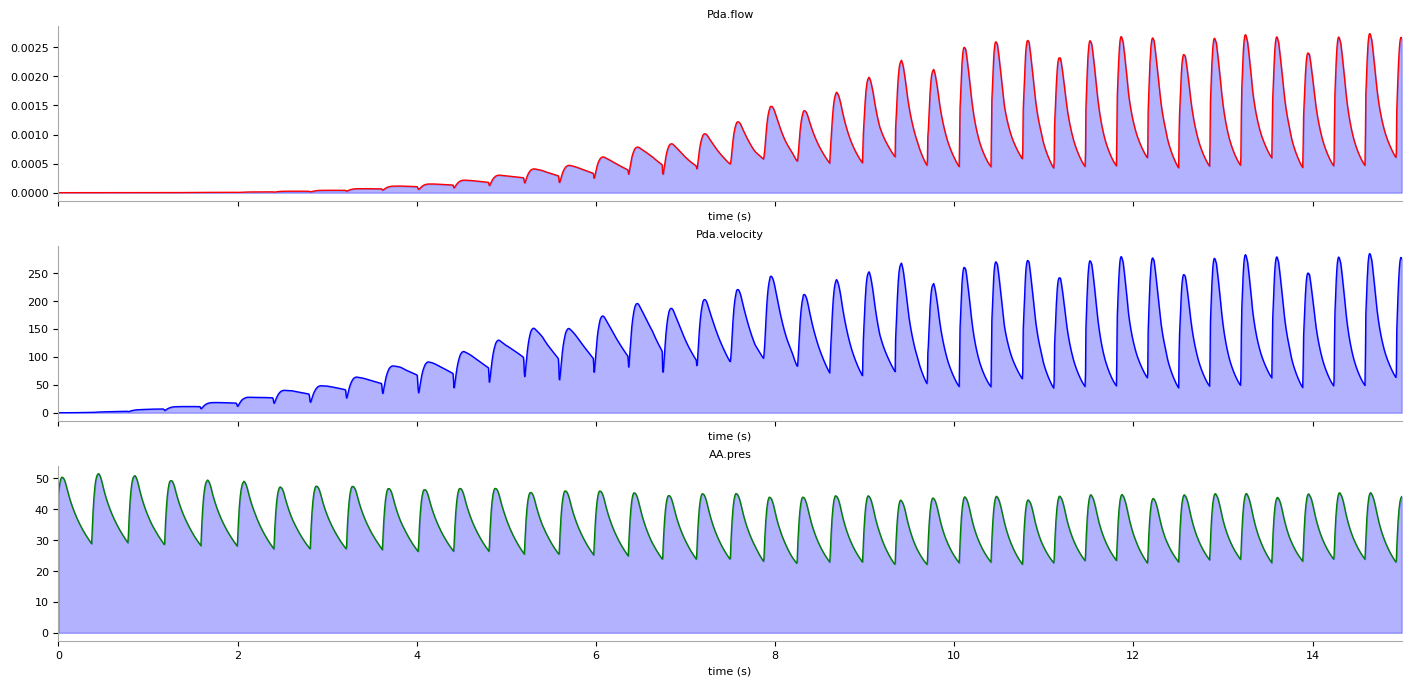

Pda.flow        : net   62.98596, forward   62.98596, backward        0.0 ml/kg/min
Pda.velocity    : max  284.36801 min        0.0
AA.pres         : max   51.40983, min   22.07416 mmHg


In [2]:
neo.pda(True)
models["Pda"].open_ductus(new_diameter=3.5, in_time=10.0)
#models["Pda"].close_ductus(in_time=10.0)
neo.plot_time_graph(["Pda.flow", "Pda.velocity", "AA.pres"], time_to_calculate=15, analyze=True, weight_based=True, sharey=False, combined=False)

In [5]:
models["DA"].r_for

1221.9018814520882